## CONPUESP 2023

Congresso dos Profissionais das Universidades Estaduais Paulistas (USP, UNESP e UNICAMP)

## Artigo

Transformação Digital na Biblioteca Florestan Fernandes: O Impacto do Desenvolvimento de Tecnologias de Software Livre na Melhoria da Dinâmica do Acesso aos Conteúdos Digitais Produzidos na Faculdade de Filosofia, Letras e Ciências Humanas da USP


In [155]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, DateFormatter

In [116]:
agendamentos = pd.read_csv('data/agendamentos.csv')
# %f: microsegundos
agendamentos['data_da_defesa'] = pd.to_datetime(agendamentos['data_da_defesa'], format='%Y-%m-%d %H:%M:%S.%f')
agendamentos.head()

,id,created_at,user_id,data_da_defesa,data_enviado_avaliacao,data_liberacao,data_resultado,status,curso,publicado,data_publicacao
0,1,2021-02-23 21:55:37.000,4,2020-12-16 14:00:00,2021-02-23,2021-02-23,2021-04-16,Aprovado,Geografia,Sim,2021-05-12
1,2,2021-02-23 22:04:42.000,6,2020-10-27 14:00:00,2021-02-23,2021-04-08,2021-04-08,Aprovado,NaN,Sim,2021-05-04
2,3,2021-02-23 23:28:56.000,7,2020-12-15 14:00:00,2021-02-23,2021-03-24,2021-04-12,Aprovado,Geografia,Sim,2021-05-12
3,4,2021-02-23 23:52:28.000,8,2021-01-21 14:00:00,2021-02-24,2021-02-24,2021-04-08,Aprovado,NaN,Sim,2021-05-12
4,5,2021-02-24 00:12:11.000,9,2021-02-01 14:00:00,2021-02-24,2021-04-15,2021-04-15,Aprovado,Geografia,Sim,2021-05-07


In [117]:
# Montar um gráfico com número de agendamentos por mês

agendamentos['yearmonth'] = agendamentos['data_da_defesa'].apply(lambda x: str(x.year) + ' ' + str(x.month))
agendamentos.head()

,id,created_at,user_id,data_da_defesa,data_enviado_avaliacao,data_liberacao,data_resultado,status,curso,publicado,data_publicacao,yearmonth
0,1,2021-02-23 21:55:37.000,4,2020-12-16 14:00:00,2021-02-23,2021-02-23,2021-04-16,Aprovado,Geografia,Sim,2021-05-12,2020 12
1,2,2021-02-23 22:04:42.000,6,2020-10-27 14:00:00,2021-02-23,2021-04-08,2021-04-08,Aprovado,NaN,Sim,2021-05-04,2020 10
2,3,2021-02-23 23:28:56.000,7,2020-12-15 14:00:00,2021-02-23,2021-03-24,2021-04-12,Aprovado,Geografia,Sim,2021-05-12,2020 12
3,4,2021-02-23 23:52:28.000,8,2021-01-21 14:00:00,2021-02-24,2021-02-24,2021-04-08,Aprovado,NaN,Sim,2021-05-12,2021 1
4,5,2021-02-24 00:12:11.000,9,2021-02-01 14:00:00,2021-02-24,2021-04-15,2021-04-15,Aprovado,Geografia,Sim,2021-05-07,2021 2


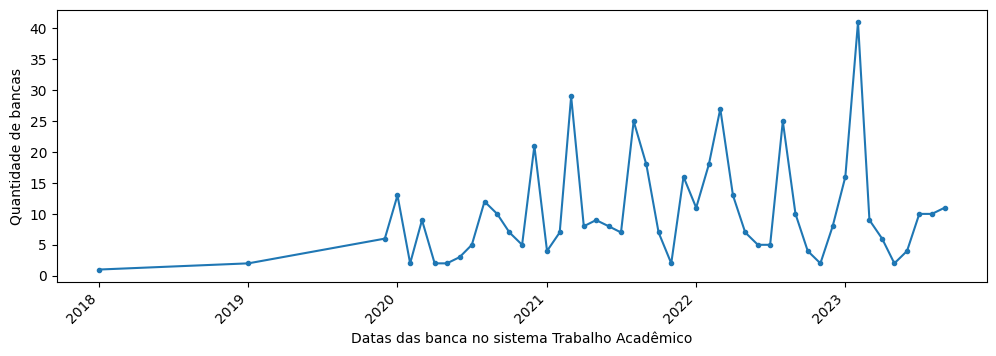

In [171]:
agendamentos_agrupados = agendamentos.groupby(['yearmonth']).size()
agendamentos_agrupados = pd.DataFrame({'yearmonth':agendamentos_agrupados.index, 'count':agendamentos_agrupados.values})

agendamentos_agrupados['date'] = pd.to_datetime(agendamentos_agrupados['yearmonth'], format='%Y %m')

ax_agendamentos = agendamentos_agrupados.plot(x='date', y='count', style='.-', rot=45, legend=None, 
        title='', xlabel='Datas das banca no sistema Trabalho Acadêmico',
        ylabel='Quantidade de bancas',
        fontsize=10, figsize=(12,4))

#plt.show()
plt.savefig("/home/thiago/agendamentos.png", dpi=150)

In [144]:
agendamentos_ano = agendamentos['data_da_defesa'].apply(lambda x: str(x.year))
agendamentos_ano = pd.DataFrame({'count':agendamentos_ano.index, 'year':agendamentos_ano.values})
agendamentos_ano.groupby(['year']).size()

year
2018      1
2019      8
2020     91
2021    140
2022    135
2023    109
dtype: int64

In [153]:
agendamentos_ano.groupby(['year']).size().sum()


484

In [131]:
pedidos = pd.read_csv('data/pedidos.csv')
# %f: microsegundos
pedidos['data'] = pd.to_datetime(pedidos['created_at'], format='%Y-%m-%d %H:%M:%S.%f')
pedidos.head()

,id,created_at,updated_at,autorizado_em,file_id,data
0,2,2021-05-21 15:42:59.000,2021-06-23 18:11:29.000,2021-06-23 18:11:29.000,2167,2021-05-21 15:42:59
1,3,2021-05-21 15:45:33.000,2021-06-23 18:18:28.000,2021-06-23 18:18:28.000,2167,2021-05-21 15:45:33
2,5,2021-05-28 17:29:31.000,2021-06-23 18:17:30.000,2021-06-23 18:17:30.000,2006,2021-05-28 17:29:31
3,6,2021-05-29 13:15:45.000,2021-06-23 18:17:41.000,2021-06-23 18:17:41.000,2127,2021-05-29 13:15:45
4,8,2021-06-22 19:03:59.000,2021-06-23 18:18:04.000,2021-06-23 18:18:04.000,2165,2021-06-22 19:03:59


In [132]:
pedidos['yearmonth'] = pedidos['data'].apply(lambda x: str(x.year) + ' ' + str(x.month))
pedidos.head()

,id,created_at,updated_at,autorizado_em,file_id,data,yearmonth
0,2,2021-05-21 15:42:59.000,2021-06-23 18:11:29.000,2021-06-23 18:11:29.000,2167,2021-05-21 15:42:59,2021 5
1,3,2021-05-21 15:45:33.000,2021-06-23 18:18:28.000,2021-06-23 18:18:28.000,2167,2021-05-21 15:45:33,2021 5
2,5,2021-05-28 17:29:31.000,2021-06-23 18:17:30.000,2021-06-23 18:17:30.000,2006,2021-05-28 17:29:31,2021 5
3,6,2021-05-29 13:15:45.000,2021-06-23 18:17:41.000,2021-06-23 18:17:41.000,2127,2021-05-29 13:15:45,2021 5
4,8,2021-06-22 19:03:59.000,2021-06-23 18:18:04.000,2021-06-23 18:18:04.000,2165,2021-06-22 19:03:59,2021 6


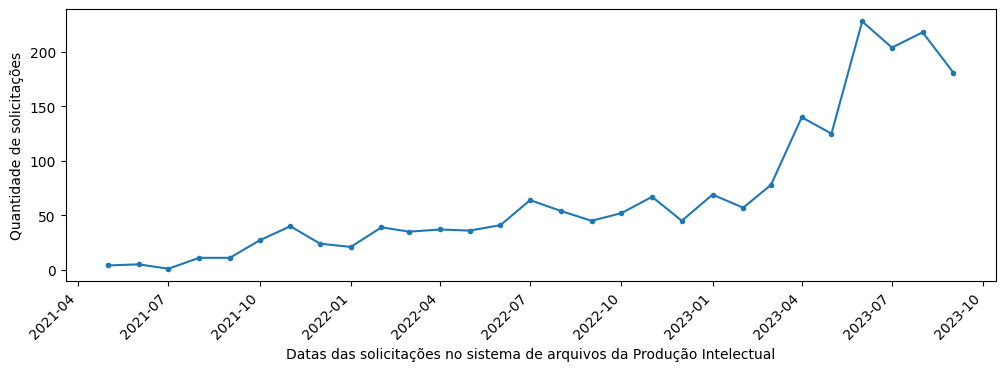

In [174]:
pedidos_agrupados = pedidos.groupby(['yearmonth']).size()
pedidos_agrupados = pd.DataFrame({'yearmonth':pedidos_agrupados.index, 'count':pedidos_agrupados.values})

pedidos_agrupados['date'] = pd.to_datetime(pedidos_agrupados['yearmonth'], format='%Y %m')

pedidos_agrupados.plot(x='date', y='count', style='.-', rot=45, legend=None, 
        title='', xlabel='Datas das solicitações no sistema de arquivos da Produção Intelectual',
        ylabel='Quantidade de solicitações',
        fontsize=10, figsize=(12,4))
#plt.show()
plt.savefig("/home/thiago/pedidos.png", dpi=150)

In [151]:
pedidos_ano = pedidos['data'].apply(lambda x: str(x.year))
pedidos_ano = pd.DataFrame({'count':pedidos_ano.index, 'year':pedidos_ano.values})
pedidos_ano.groupby(['year']).size()

year
2021     123
2022     536
2023    1300
dtype: int64

In [152]:
pedidos_ano.groupby(['year']).size().sum()

1959